# Exploring Martian Surface Features through Convolutional Neural Networks (CNNs)
[The European Space Agency (ESA)](https://www.euronews.com/2019/10/12/european-space-agency-probe-captures-new-photos-of-700km-dried-up-river-system-on-mars) shared images of a fossilized river system on Mars, spanning almost 700 kilometers. Surprisingly, the Martian surface bears a striking resemblance to Earth's. 

We aim to train CNNs using this image to understand Mars' surface features.

Let’s apply the convolution layer, activation layer, and pooling layer operation to extract the inside feature.

The example code can be found on [geeks for geeks](https://www.geeksforgeeks.org/introduction-convolution-neural-network/).




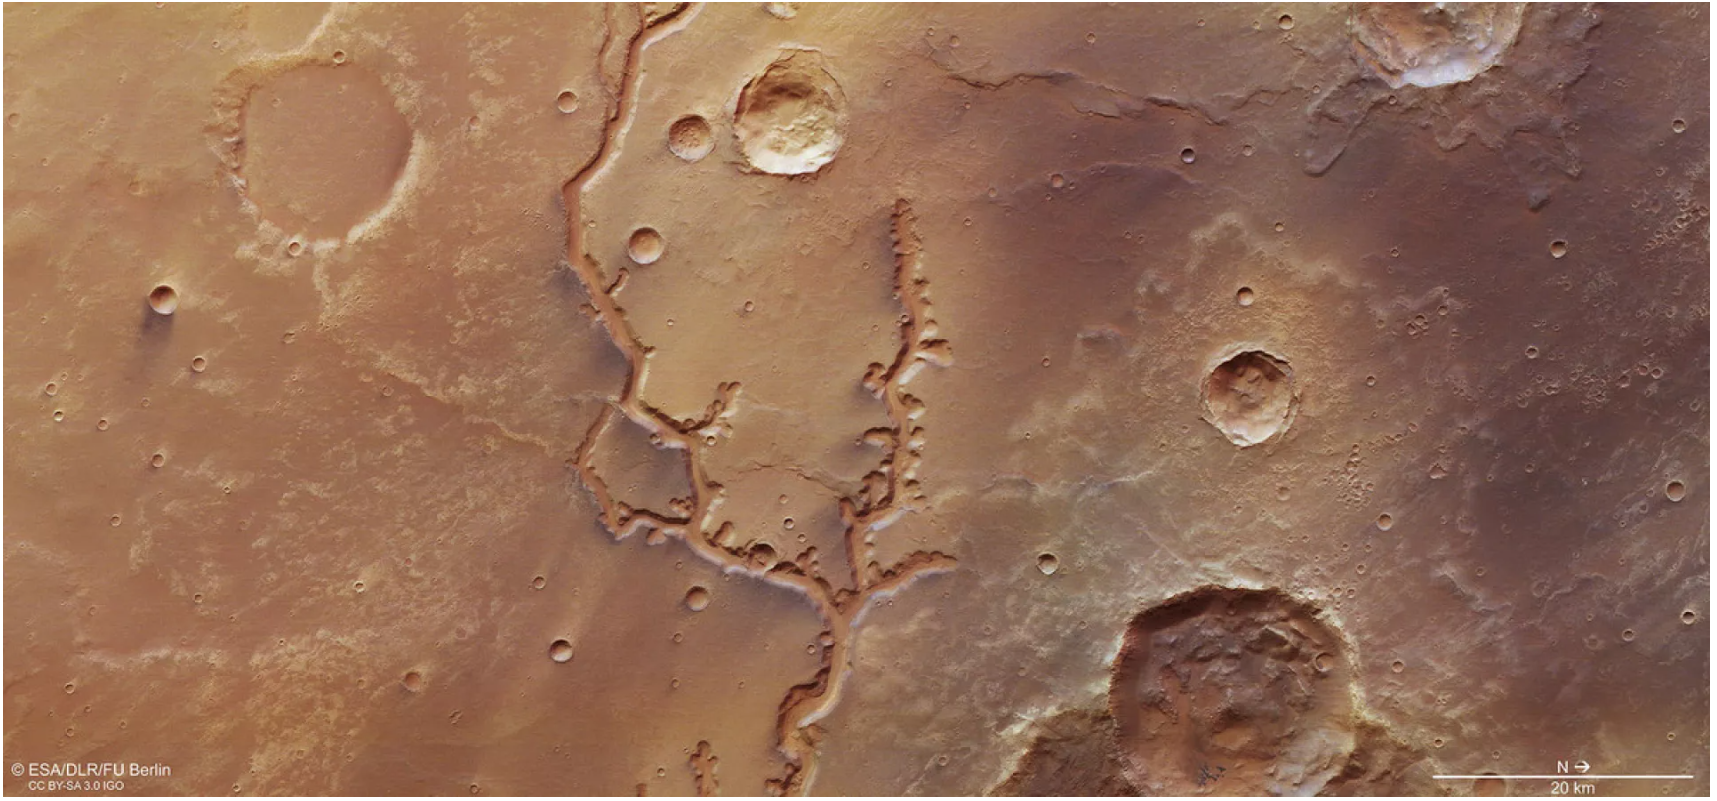

## Import The Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product 

## Define the Kernel

In [2]:
kernel = tf.constant([[-1, -1, -1],
                    [-1,  10, -1],
                    [-1, -1, -1],
                   ])

## Plot The Input Image

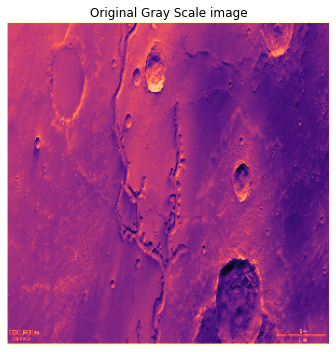

In [3]:
# load the image
image = tf.io.read_file('mars_water.png')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# set the param for the figure
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')
 
# plot the image
img = tf.squeeze(image).numpy()
# print(img)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

In [4]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

### Convolution Layer - Activation Layer - Pooling Layer

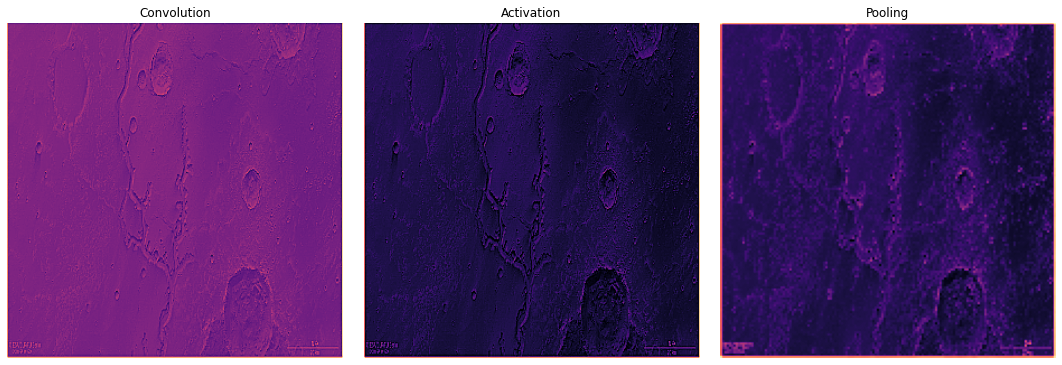

In [5]:
# convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
) 
# Plot the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')


# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)
# Plot the activation layer image
plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')
 

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )
# Plot thepooling layer
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

__Advantages__ of Convolutional Neural Networks (CNNs):
- Good at detecting patterns and features in images, videos, and audio signals.
- Robust to translation, rotation, and scaling invariance.
- End-to-end training, no need for manual feature extraction.
- Can handle large amounts of data and achieve high accuracy.


__Disadvantages__ of Convolutional Neural Networks (CNNs):
- Computationally expensive to train and require a lot of memory.
- Can be prone to overfitting if not enough data or proper regularization is used.
- Requires large amounts of labeled data.
- Interpretability is limited, it’s hard to understand what the network has learned.